In [1]:
import pandas as pd
from array import array

df = pd.read_csv(
    'https://raw.githubusercontent.com/CodersLab/DataLab_intro/main/iterim/BankChurner_ColumnsRenamed.csv',
    sep=';'
    )

In [2]:
df.head() # sprawdźmy czy poprawnie wczytany 

,Client_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df.describe() # sprawdzamy dalej

,Client_ID,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [4]:
df["Attrition_Flag"].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [7]:
pd.array(['Existing Customer', 'Attrited Customer'], dtype=object)

<PandasArray>
['Existing Customer', 'Attrited Customer']
Length: 2, dtype: object

In [8]:
df["Is_Active"] = 1

is_active = df["Attrition_Flag"] == "Attrited Customer"
df.loc[is_active, "Is_Active"] = 0

In [9]:
df[["Attrition_Flag", "Is_Active"]].drop_duplicates()

,Attrition_Flag,Is_Active
0,Existing Customer,1
21,Attrited Customer,0


In [10]:
df["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [11]:
income_below_40k = df["Income_Category"] == "Less than $40K"
df.loc[income_below_40k, "Income_Category"] = "1. < $40K"

income_below_60k = df["Income_Category"] == "$40K - $60K"
df.loc[income_below_60k, "Income_Category"] = "2. $40K - 60K"

income_below_80k = df["Income_Category"] == "$60K - $80K"
df.loc[income_below_80k, "Income_Category"] = "3. $60K - 80K"

income_below_120k = df["Income_Category"] == "$80K - $120K"
df.loc[income_below_120k, "Income_Category"] = "4. $80K - 120K"

income_above_120k = df["Income_Category"] == "$120K +"
df.loc[income_above_120k, "Income_Category"] = "5. 120K+"

income_unknown = df["Income_Category"] == "Unknown"
df.loc[income_unknown, "Income_Category"] = "6. Unknown"

In [12]:
df["Income_Category"].unique()

array(['3. $60K - 80K', '1. < $40K', '4. $80K - 120K', '2. $40K - 60K',
       '5. 120K+', '6. Unknown'], dtype=object)

In [13]:
uneducated = df["Education_Level"] == "Uneducated"
df.loc[uneducated, "Education_Level"] = "1. Uneducated"

collage = df["Education_Level"] == "College"
df.loc[collage, "Education_Level"] = "2. College"

high_school = df["Education_Level"] == "High School"
df.loc[high_school, "Education_Level"] = "3. High School"

graduate = df["Education_Level"] == "Graduate"
df.loc[graduate, "Education_Level"] = "4. Graduate"

post_graduate = df["Education_Level"] == "Post-Graduate"
df.loc[post_graduate, "Education_Level"] = "5. Post-Graduate"

doctorate = df["Education_Level"] == "Doctorate"
df.loc[doctorate, "Education_Level"] = "6. Doctorate"

unknown = df["Education_Level"] == "Unknown"
df.loc[unknown, "Education_Level"] = "7. Unknown"

In [14]:
df["Education_Level"].unique()

array(['3. High School', '4. Graduate', '1. Uneducated', '7. Unknown',
       '2. College', '5. Post-Graduate', '6. Doctorate'], dtype=object)

In [15]:
blue_cards = df["Card_Category"] == "Blue"
df.loc[blue_cards, "Card_Category"] = "1. Blue"

silver_cards = df["Card_Category"] == "Silver"
df.loc[silver_cards, "Card_Category"] = "2. Silver"

gold_cards = df["Card_Category"] == "Gold"
df.loc[gold_cards, "Card_Category"] = "3. Gold"

platinum_cards = df["Card_Category"] == "Platinum"
df.loc[platinum_cards, "Card_Category"] = "4. Platinum"

In [16]:
df["Card_Category"].unique()

array(['1. Blue', '3. Gold', '2. Silver', '4. Platinum'], dtype=object)

In [17]:
def analyse_column(column_name):
    result = df.\
        groupby(by=[column_name])["Is_Active"].\
        agg([
            "mean",  # określenie średniej
            "count",  # określenie liczebności grupy
            lambda x: sum(1-x),   # liczba kart, które zostały dezaktywowane (0)
            lambda x: sum(1-x)/len(x) - 0.16  # odchylenie od średniej globalnej
        ])

    # nadanie tabeli opisowych nazw kolumn
    # ponieważ po tym kroku były by dostępne następujące:
    # mean, count, <lambda_0>, <lambda_1>
    # które nic nie opisują
    result.columns = [
        "Active_Ratio",
        "Group_Size",
        "Deactivated_Amount",
        "Deviation_From_Global"
    ]
    return result

In [18]:
analyse_column("Client_ID")

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Client_ID,,,,
708082083,1.0,1,0,-0.16
708083283,0.0,1,1,0.84
708084558,0.0,1,1,0.84
708085458,1.0,1,0,-0.16
708086958,1.0,1,0,-0.16
...,...,...,...,...
828288333,1.0,1,0,-0.16
828291858,0.0,1,1,0.84
828294933,0.0,1,1,0.84


In [20]:
import matplotlib.pyplot as plt

def visualize_analysis(df, compare_value):
    plt.figure(figsize=(15,10))  # określenie wymiaru figury (w calach)

    x = df.index.astype(str)  # wartości na osi x
    y = df["Active_Ratio"]  # wartości na osi y

    plt.bar(x, y)  # określenie typu wykresu, jaki chemy wykreślić – tutaj słupkowy

    # stylowanie wykresu
    plt.xlabel("Group")  # dodanie legendy dla osi x
    plt.ylabel("Active ratio")  # dodanie legendy dla osi y
    plt.title("Active ratio by groups")  # nadanie tytułu dla wykresu

    # dodamy również linię poziomą, do której będziemy mogli odnosić poszczególne grupy
    plt.axhline(compare_value, color="red", linestyle="--")

    plt.show()

In [21]:
gender_analysis = analyse_column("Gender")
gender_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Gender,,,,
F,0.826428,5358,930,0.013572
M,0.853848,4769,697,-0.013848


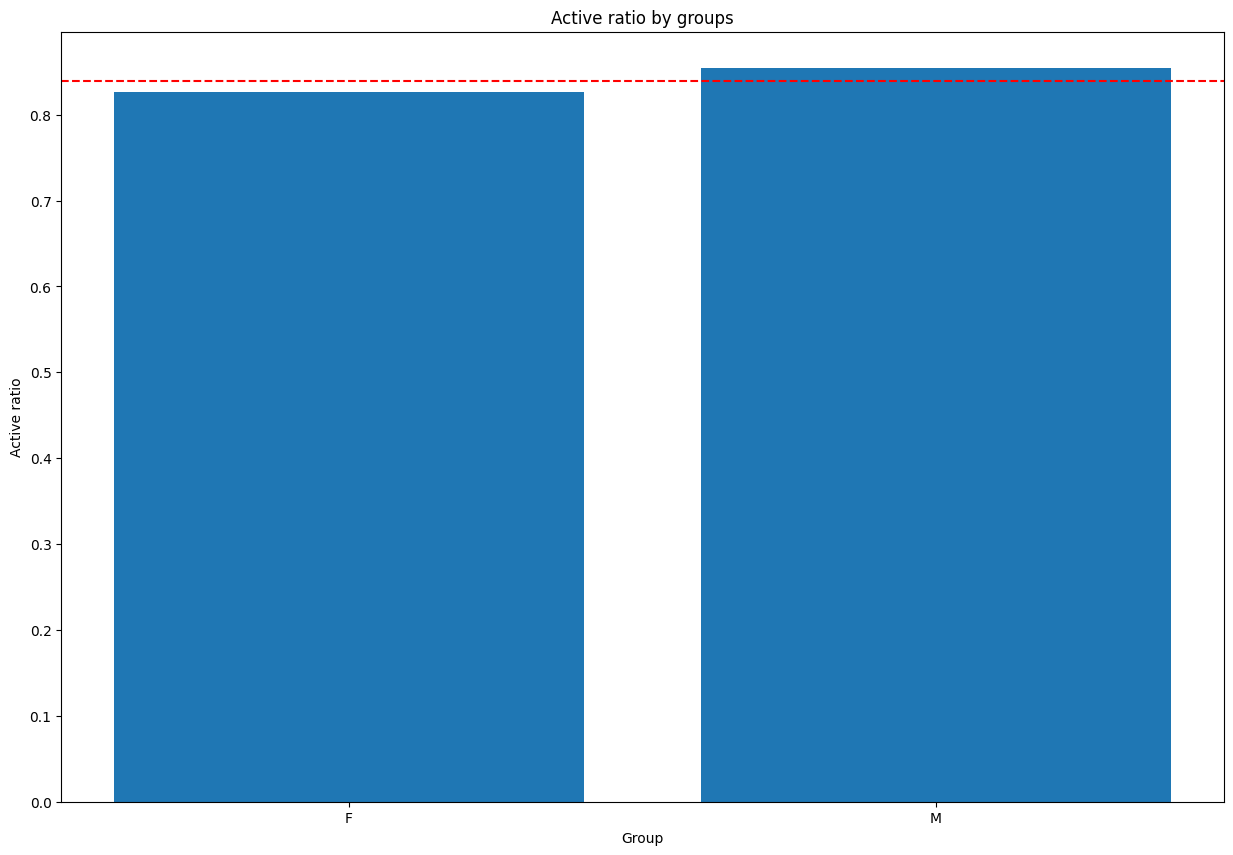

In [22]:
global_mean = df["Is_Active"].mean()  # określenie globalnego poziomu aktywnych kart
visualize_analysis(gender_analysis, global_mean)

In [23]:
education_analysis = analyse_column("Education_Level")
education_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Education_Level,,,,
1. Uneducated,0.840619,1487,237,-0.000619
2. College,0.847976,1013,154,-0.007976
3. High School,0.847988,2013,306,-0.007988
4. Graduate,0.844309,3128,487,-0.004309
5. Post-Graduate,0.821705,516,92,0.018295
6. Doctorate,0.789357,451,95,0.050643
7. Unknown,0.831468,1519,256,0.008532


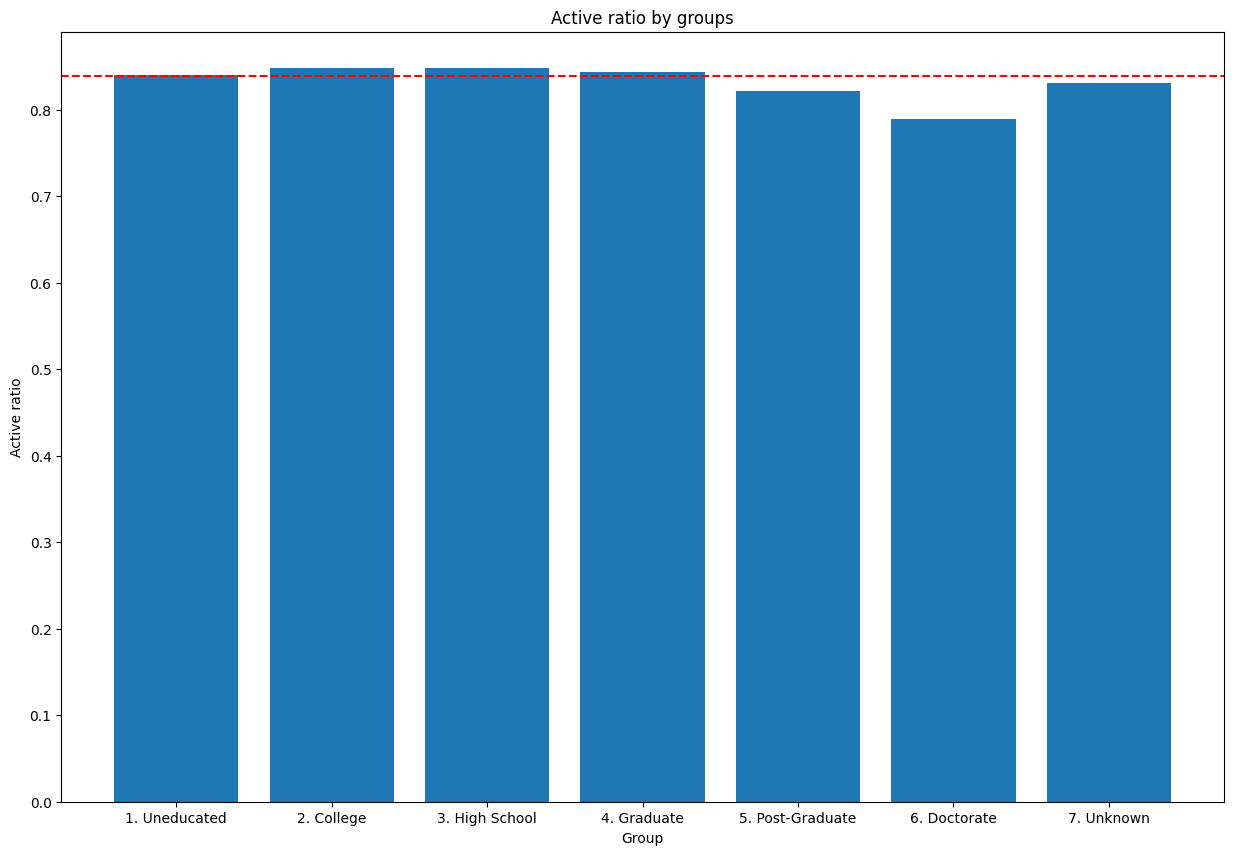

In [24]:
visualize_analysis(education_analysis, global_mean)

In [25]:
income_analysis = analyse_column("Income_Category")
income_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Income_Category,,,,
1. < $40K,0.828138,3561,612,0.011862
2. $40K - 60K,0.848603,1790,271,-0.008603
3. $60K - 80K,0.865193,1402,189,-0.025193
4. $80K - 120K,0.842345,1535,242,-0.002345
5. 120K+,0.826685,727,126,0.013315
6. Unknown,0.831835,1112,187,0.008165


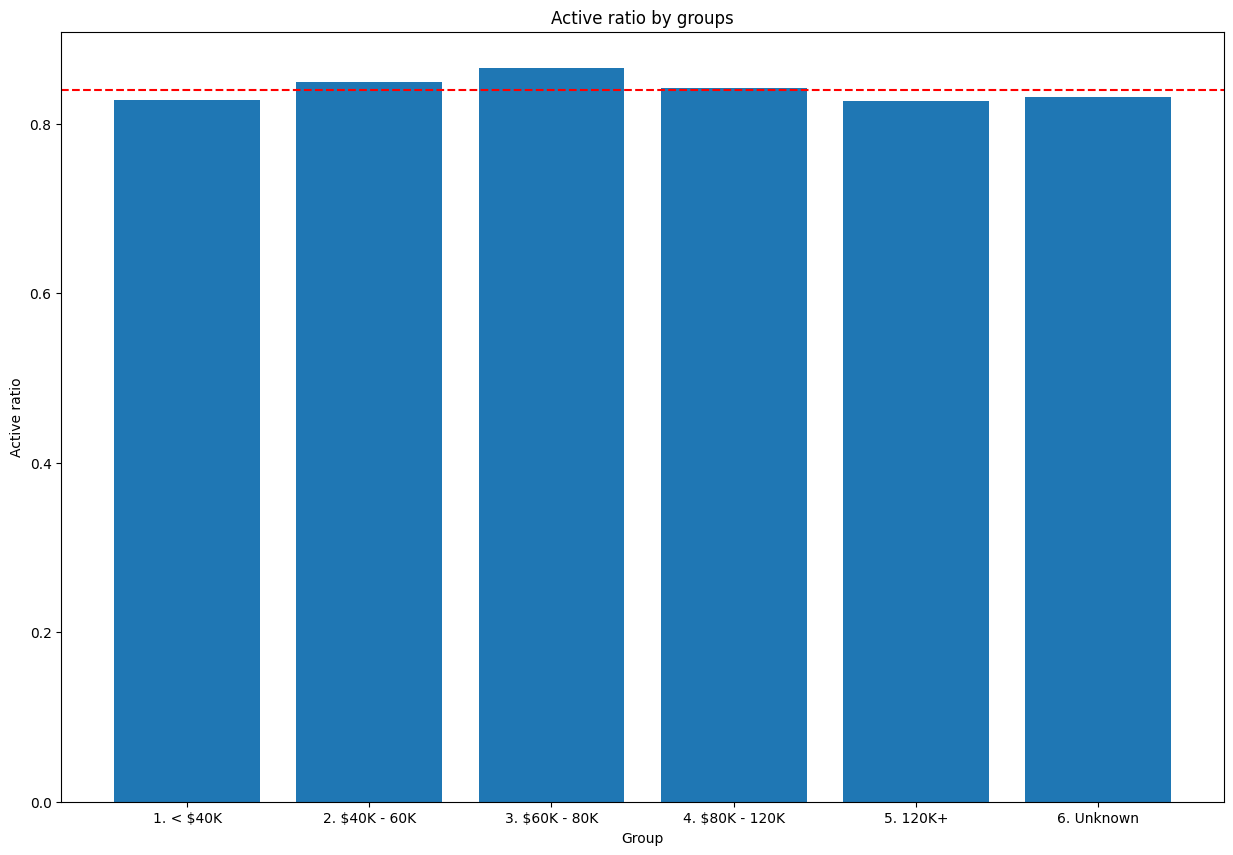

In [26]:
visualize_analysis(income_analysis, global_mean)

In [27]:
df["Years_on_book"] = pd.cut(
    x=df["Months_on_book"]/12,  # zmienna, którą chcemy pogrupować
    bins=[1, 2, 3, 4, 5]  # koszyki, według których dane mają być pogrupowane
    )

In [28]:
months_analysis = analyse_column("Years_on_book")
months_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Years_on_book,,,,
"(1, 2]",0.851240,847,126,-0.011240
"(2, 3]",0.839240,5418,871,0.000760
"(3, 4]",0.838167,3207,519,0.001833
"(4, 5]",0.830534,655,111,0.009466


In [29]:
card_analysis = analyse_column("Card_Category")
card_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Card_Category,,,,
1. Blue,0.839021,9436,1519,0.000979
2. Silver,0.852252,555,82,-0.012252
3. Gold,0.818966,116,21,0.021034
4. Platinum,0.750000,20,5,0.090000


In [30]:
bins = list(range(25, 60, 5))  # wygenerowanie koszyków wiekowych od 25 do 55 lat
bins.append(75)  # maksymalny wiek to 73, więc dla spójności zaokrąglimy tę wartośc w górę

df["Customer_Age_agg"] = pd.cut(df["Customer_Age"], bins=bins)

In [31]:
customer_age_analysis = analyse_column("Customer_Age_agg")
customer_age_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Customer_Age_agg,,,,
"(25, 30]",0.879245,265,32,-0.039245
"(30, 35]",0.862385,654,90,-0.022385
"(35, 40]",0.851150,1478,220,-0.011150
"(40, 45]",0.829505,2264,386,0.010495
"(45, 50]",0.835427,2388,393,0.004573
"(50, 55]",0.831139,1747,295,0.008861
"(55, 75]",0.841473,1331,211,-0.001473


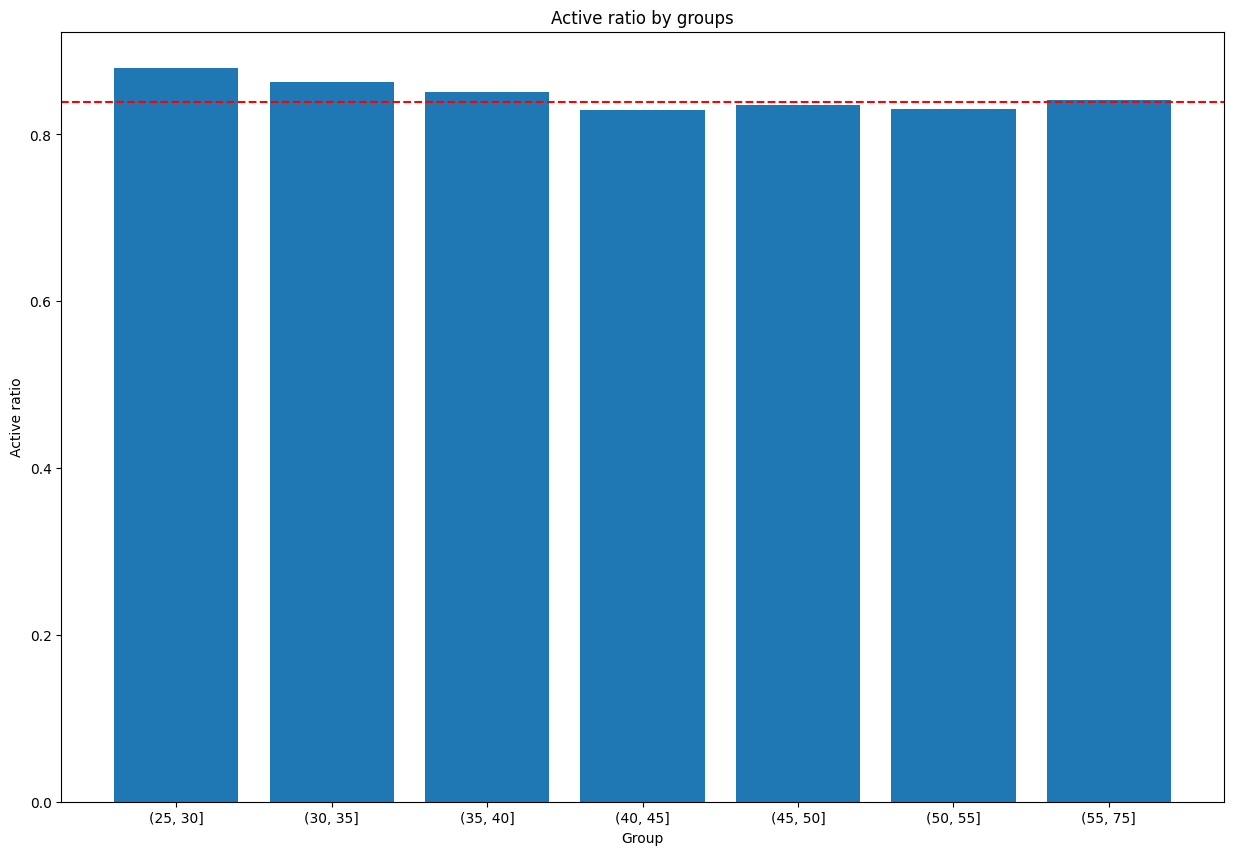

In [32]:
visualize_analysis(customer_age_analysis, global_mean)

In [33]:
bins = list(range(500, 5500, 500))
bins.append(20000)

In [34]:
df["Total_Trans_Amt_agg"] = pd.cut(df["Total_Trans_Amt"], bins=bins)

In [35]:
total_trans_amt_analysis = analyse_column("Total_Trans_Amt_agg")
total_trans_amt_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Total_Trans_Amt_agg,,,,
"(500, 1000]",0.117284,162,143,0.722716
"(1000, 1500]",0.906840,848,79,-0.066840
"(1500, 2000]",0.791319,1198,250,0.048681
"(2000, 2500]",0.488327,1028,526,0.351673
"(2500, 3000]",0.567322,661,286,0.272678
"(3000, 3500]",0.944898,490,27,-0.104898
"(3500, 4000]",0.992231,901,7,-0.152231
"(4000, 4500]",0.998708,1548,2,-0.158708
"(4500, 5000]",0.963675,1404,51,-0.123675


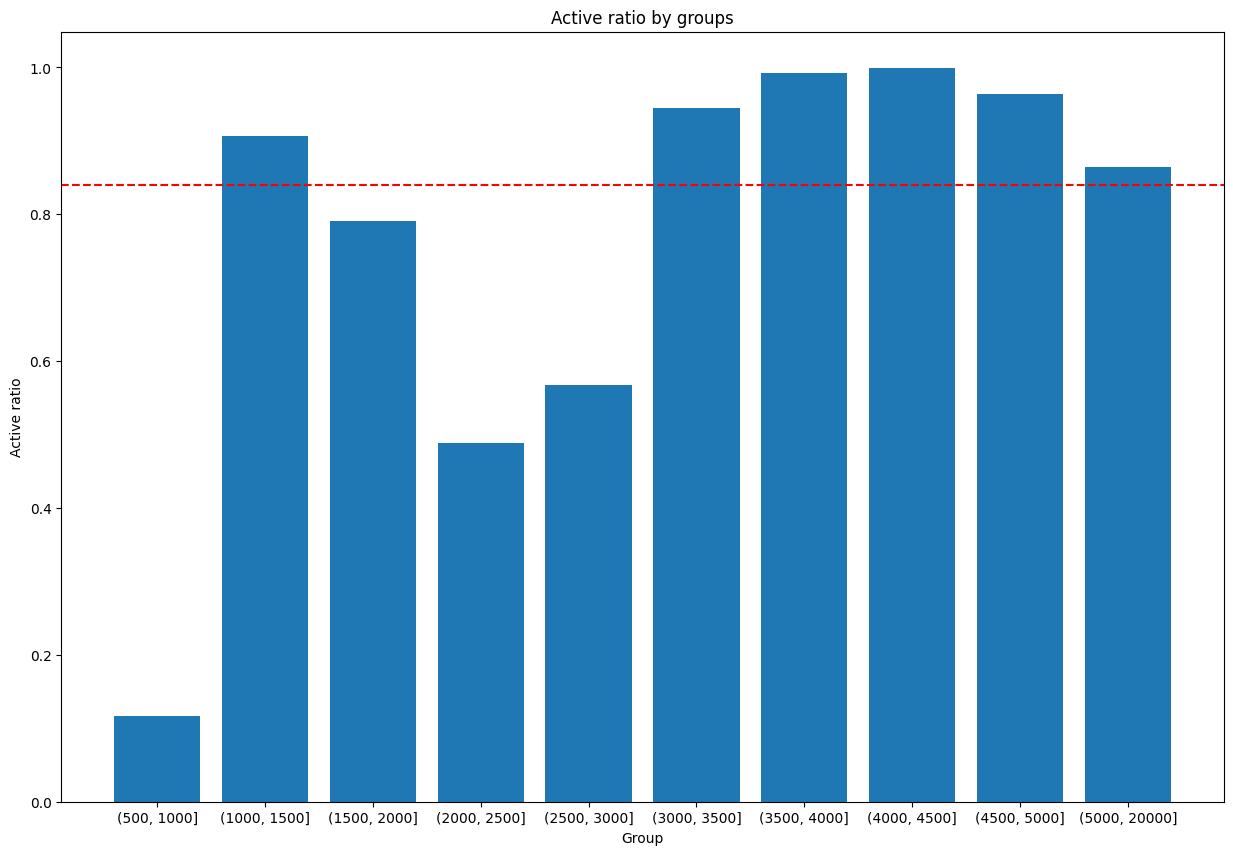

In [36]:
visualize_analysis(total_trans_amt_analysis, global_mean)

In [37]:
df["Total_Trans_Ct"].describe()

count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64

In [38]:
df["Total_Trans_Ct_agg"] = pd.cut(df["Total_Trans_Ct"], bins=range(0, 150, 10))

In [39]:
total_tranc_ct_analysis = analyse_column("Total_Trans_Ct_agg")
total_tranc_ct_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Total_Trans_Ct_agg,,,,
"(0, 10]",0.000000,4,4,0.840000
"(10, 20]",0.330435,115,77,0.509565
"(20, 30]",0.787565,579,123,0.052435
"(30, 40]",0.671774,1240,407,0.168226
"(40, 50]",0.515966,1190,576,0.324034
"(50, 60]",0.778020,919,204,0.061980
"(60, 70]",0.923827,1641,125,-0.083827
"(70, 80]",0.957650,1889,80,-0.117650
"(80, 90]",0.979777,1434,29,-0.139777


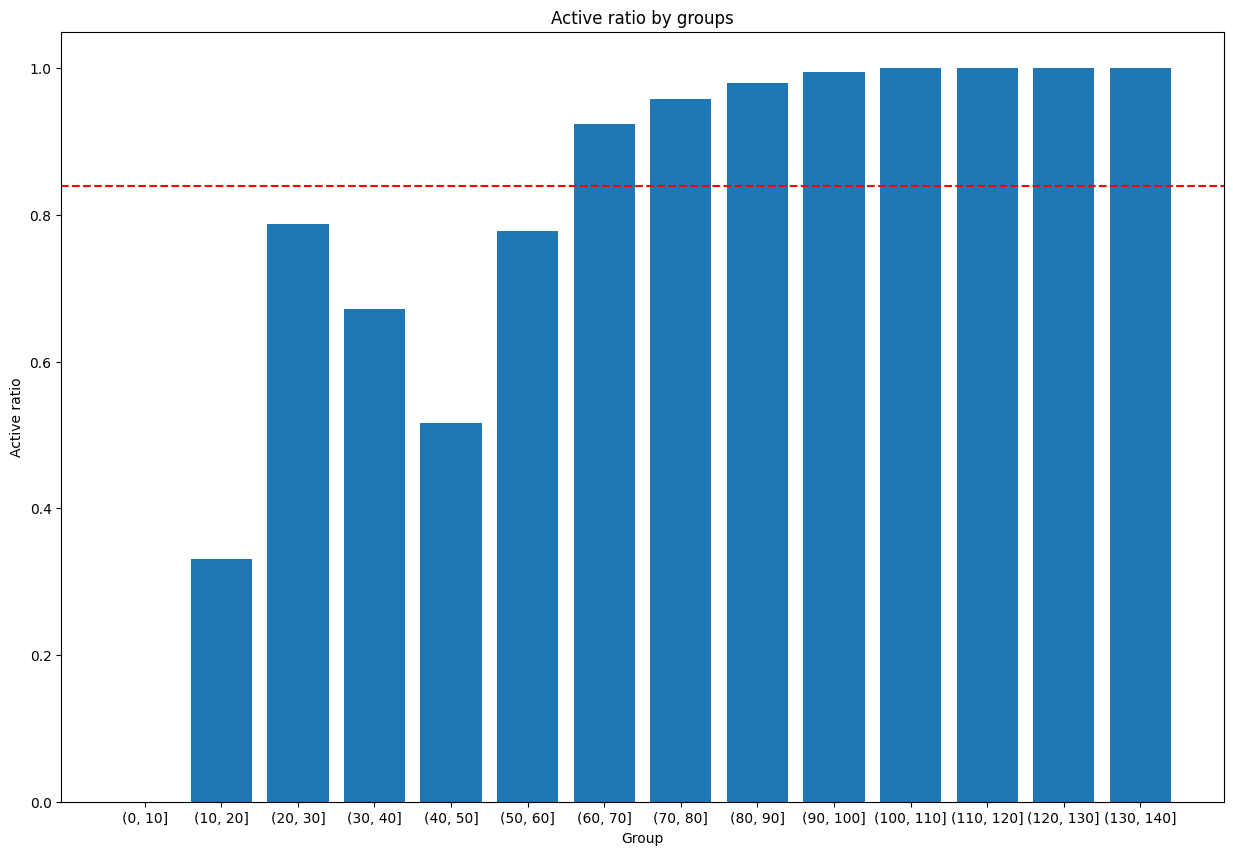

In [40]:
visualize_analysis(total_tranc_ct_analysis, global_mean)

In [41]:
amt_vs_ct = pd.pivot_table(
    df,  # ramka danych, którą chcemy przetworzyć
    index="Total_Trans_Ct_agg",  # określenie kolumny, której wartości mają być na wierszach
    columns="Total_Trans_Amt_agg",  # określenie kolumny, której wartości mają być na kolumnach
    values="Gender",  # określenie kolumny, którą chcemy zagregować
    aggfunc="count"  # określenie funkcji agregacji kolumny Gender
)
amt_vs_ct

Total_Trans_Amt_agg,"(500, 1000]","(1000, 1500]","(1500, 2000]","(2000, 2500]","(2500, 3000]","(3000, 3500]","(3500, 4000]","(4000, 4500]","(4500, 5000]","(5000, 20000]"
Total_Trans_Ct_agg,,,,,,,,,,
"(0, 10]",4,0,0,0,0,0,0,0,0,0
"(10, 20]",79,30,6,0,0,0,0,0,0,0
"(20, 30]",71,376,116,13,3,0,0,0,0,0
"(30, 40]",8,377,527,251,69,5,0,0,1,2
"(40, 50]",0,64,407,437,220,28,12,5,14,3
"(50, 60]",0,1,129,226,161,122,117,63,60,40
"(60, 70]",0,0,13,82,144,211,358,451,230,152
"(70, 80]",0,0,0,16,54,95,315,627,491,291
"(80, 90]",0,0,0,2,8,25,93,369,525,412


In [42]:
amt_selector = df["Total_Trans_Amt_agg"].astype(str).isin(["(2000, 2500]", "(2500, 3000]"])
ct_selector = df["Total_Trans_Ct_agg"].astype(str).isin(["(30, 40]", "(40, 50]"])
to_select = amt_selector | ct_selector  # operator | oznacza potoczne lub, więc zostaną wybrane elemnty z jednego lub drugiego zbioru

selected = df.loc[to_select]
not_selected = df.loc[~to_select]

In [43]:
# sprawdzenie poprawności odfiltrowania
selected.shape

(3142, 26)

In [44]:
selected.to_csv(
    "./BankChurner_Deactivated.csv",
    sep=";",
    index=False
)

not_selected.to_csv(
    "./BankChurner_Active.csv",
    sep=";",
    index=False
)